#### Task1_0731. iris 데이터셋에 대하여 n_components=2를 적용하고 TruncatedSVD를 사용하여 추출된 2개의 component로 품종을 구분하는 것을 시각화하세요. 

- from sklearn.decomposition import TruncatedSVD

Text(0, 0.5, 'Truncated_component_2')

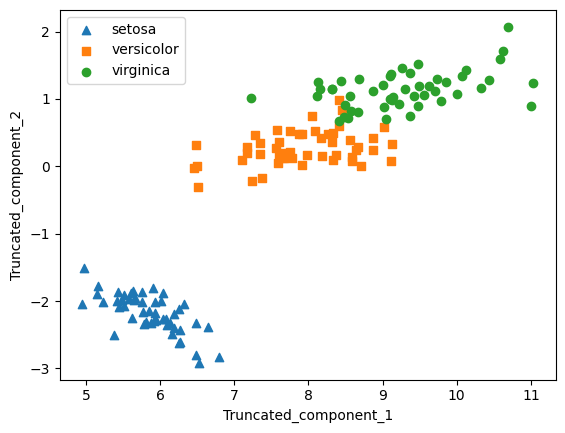

In [26]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

tsvd_columns = ["trunc_compo_1", "trunc_compo_2"]
df_iris_tsvd = pd.DataFrame(iris_tsvd, columns=tsvd_columns)
df_iris_tsvd['target'] = iris.target

markers = ["^", "s", "o"]

for i, marker in enumerate(markers):
    x_axis_data = df_iris_tsvd[df_iris_tsvd["target"] == i]["trunc_compo_1"]
    y_axis_data = df_iris_tsvd[df_iris_tsvd["target"] == i]["trunc_compo_2"]
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel("Truncated_component_1")
plt.ylabel("Truncated_component_2")

#### Task2_0731. Task1_0731 사례를 PCA로 적용한 시각화 결과와 비교하세요.

(150, 2)
<class 'numpy.ndarray'>


Text(0, 0.5, 'pca_component_2')

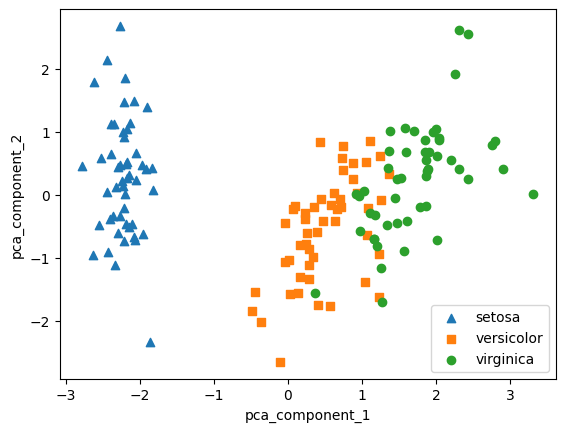

In [25]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = load_iris()

columns = iris.feature_names
df_iris = pd.DataFrame(iris.data, columns=columns)
df_iris['target'] = iris.target

X = df_iris.iloc[:, :-1]
y = df_iris.iloc[:, -1]

scaled_X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(scaled_X)
print(iris_pca.shape)
print(type(iris_pca))
pca_columns = ["pca_component_1", "pca_component_2"]
df_iris_pca = pd.DataFrame(iris_pca, columns=pca_columns)
df_iris_pca['target'] = iris.target

markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = df_iris_pca[df_iris_pca['target'] == i]['pca_component_1']
    y_axis_data = df_iris_pca[df_iris_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel("pca_component_1")
plt.ylabel("pca_component_2")

#### Task3_0731. 와인 품질 데이터셋을 사용하여 Truncated SVD를 통해 차원 축소를 수행하고, 로지스틱 회귀 모델을 학습 및 평가를 수행하세요.(다음 사항 참조)



- 특성 및 레이블 분리: 데이터셋에서 와인의 화학적 특성(X)과 품질 레이블(y)을 분리합니다.
- 레이블 변환: 와인 품질을 범주형 변수로 변환합니다. 구체적으로, 품질 점수가 3-5인 경우 'low', 6인 경우 'medium', 7-8인 경우 'high'로 변환합니다.
- 데이터 정규화: StandardScaler를 사용하여 데이터의 특성을 정규화합니다.
- 차원 축소: TruncatedSVD를 사용하여 데이터의 차원을 5로 축소합니다.
- 데이터 분할: 데이터를 학습용과 테스트용으로 분할합니다.
- 모델 학습: 로지스틱 회귀 모델을 학습합니다.
- 모델 예측 및 평가: 테스트 데이터에 대한 예측을 수행하고, 정확도와 분류 보고서를 출력

In [70]:
import pandas as pd

# 1. 데이터 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [71]:
data['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [73]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

import seaborn as sns

sns.heatmap(data.isnull(), cbar=False, cmap='viridis') # 결측치 확인

<Axes: >

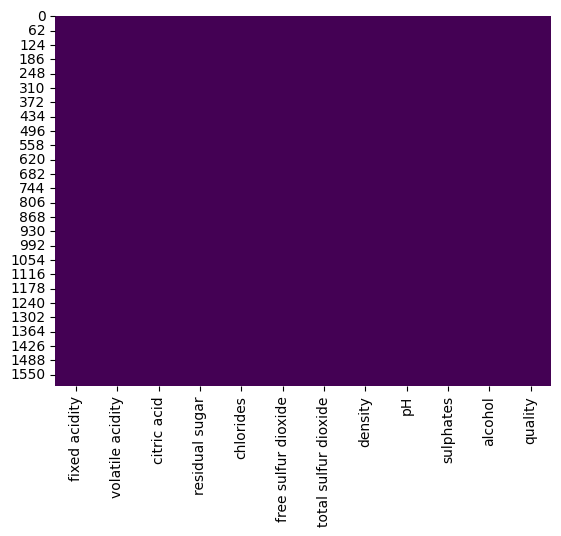

In [29]:
import seaborn as sns

sns.heatmap(data.isnull(), cbar=False, cmap="viridis")  # 결측치 확인

In [74]:
# 특성 및 레이블 분리

X = data.iloc[:,:-1]
y = data.iloc[:,-1]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [50]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1599 entries, 0 to 1598
Series name: quality
Non-Null Count  Dtype
--------------  -----
1599 non-null   int64
dtypes: int64(1)
memory usage: 12.6 KB


In [52]:
y.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [53]:
# 레이블 변환
y[y == 3]

459     3
517     3
690     3
832     3
899     3
1299    3
1374    3
1469    3
1478    3
1505    3
Name: quality, dtype: int64

In [75]:
# 품질 점수가 3-5인 경우 'low', 6인 경우 'medium', 7-8인 경우 'high'

bins = [2,5,6,8]
labels = ['low','medium','high']
y = pd.cut(y, bins=bins, labels=labels)

In [65]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1599 entries, 0 to 1598
Series name: quality
Non-Null Count  Dtype   
--------------  -----   
1589 non-null   category
dtypes: category(1)
memory usage: 1.8 KB


In [76]:
# 데이터 정규화: StandardScaler를 사용하여 데이터의 특성을 정규화합니다.
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scaled_X = scalar.fit_transform(X)


In [77]:
# 차원 축소: TruncatedSVD를 사용하여 데이터의 차원을 5로 축소합니다.

from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=5)
tsvd.fit(scaled_X)
X_tsvd = tsvd.transform(scaled_X)

In [78]:
# 데이터 분할: 데이터를 학습용과 테스트용으로 분할합니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tsvd, y, test_size=0.3, random_state=42)


In [ ]:
X_train

In [ ]:
y_train

In [79]:
# 모델 학습: 로지스틱 회귀 모델을 학습합니다.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)


LogisticRegression()

In [81]:
# 모델 예측 및 평가: 테스트 데이터에 대한 예측을 수행하고, 정확도와 분류 보고서를 출력
from sklearn.metrics import accuracy_score, classification_report

pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, pred)
report = classification_report(y_test, pred)
print(f'정확도 : {accuracy}')
print('분류보고서')
print(report)

정확도 : 0.5666666666666667
분류보고서
              precision    recall  f1-score   support

        high       0.44      0.27      0.33        67
         low       0.63      0.78      0.70       213
      medium       0.50      0.44      0.47       200

    accuracy                           0.57       480
   macro avg       0.52      0.50      0.50       480
weighted avg       0.55      0.57      0.55       480

